### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import IPython
from mpl_toolkits.axes_grid1 import make_axes_locatable
from misc import reportProgress
from scipy.ndimage.filters import gaussian_filter
from misc import round_sig_str as round_sig_str
import misc
import GaussianFilter as gf
import minBlur as mb

In [2]:
from importlib import reload

In [3]:
reload(gf)
reload(mb)

<module 'minBlur' from 'C:\\Users\\wdwor\\Documents\\Simulation\\minBlur.py'>

In [4]:
avgPhotonsPerImage = 50
QE = 0.9
darkElectronChance = 0.0003
seed = random.randint(1,70)
rs = np.random.RandomState(seed)
size = 40
#center of array
p0=int(size/2)
h_pixelsInBin = 2
v_pixelsInBin = 2

### Create a 3D Gaussian

In [5]:
def gaus(x, m, s):
    return (1/(s*np.sqrt(2*np.pi))*np.exp(-(x-m)**2/(2*s**2)))                            

xx, yy, zz = np.meshgrid(np.arange(size), np.arange(size), np.arange(size))
gaus3d = avgPhotonsPerImage*gaus(xx, p0, 2)*gaus(yy, p0, 2)*gaus(zz, p0, 2)

In [6]:
def gaussian(intensity, x0, y0, sigma):
        x_values = np.arange(0, size, 1)
        X, Y = np.meshgrid(x_values, x_values)
        return ((intensity)/(2*np.pi*(sigma**2))*np.exp(-(((X-x0)**2)+(Y-y0)**2)/(2*sigma**2)))

### Test: Gaussian on 1st slice

In [7]:
def gaus(x, m, s):
    return (1/(s*np.sqrt(2*np.pi))*np.exp(-(x-m)**2/(2*s**2)))                            

xx, yy = np.meshgrid(np.arange(size), np.arange(size))
gaus2d = avgPhotonsPerImage*gaus(xx, p0, 2)*gaus(yy, p0, 2)

In [8]:
test3D = np.zeros((size,size,size))
test3D[0]=gaus2d

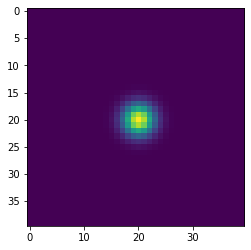

In [9]:
#print(test3D)
plt.imshow(test3D[0])

In [10]:
reload(gf)
reload(mb)

<module 'minBlur' from 'C:\\Users\\wdwor\\Documents\\Simulation\\minBlur.py'>

### Define the XYZ Blur function

In [11]:
## resImage = np.zeros((size,size))

def XYZ_Blur(input3D, zTotalSize = 5e-6, zDepBlur = True, xyDepBlur = True, fovSize = 20e-6):
    """
    zTotalSize is the z direction length in meters.
    """
    fsill = 0.0156
    all2DSlices = [input3D[i] for i in range(0,size)]
    blurrySlicesGausTest = []
    dz = np.linspace(-zTotalSize/2, zTotalSize/2, size)
   
    for j in range(0,len(all2DSlices)):
        if zDepBlur:
            zBlurredAmount = mb.minBlur(dz[j]+fsill)
        else:
            zBlurredAmount = mb.minBlur(fsill)
        reportProgress(j, len(all2DSlices))
            
        xyzBlurrySlice = gf.gaussianFilter(all2DSlices[j], zBlurredAmount, 20e-6, xyDepBlur, fovSize)
                    
        blurrySlicesGausTest.append(xyzBlurrySlice)

    blurrySlicesSum = sum(blurrySlicesGausTest)
    
    return blurrySlicesSum

### Test delta

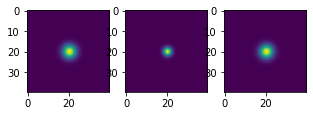

In [12]:
fig, axs = plt.subplots(1,3, figsize=(5,15))

testDelta = np.zeros((size,size,size))
testDelta[0,20,20]=1
blurredPhotonImageDelt = XYZ_Blur(testDelta)
axs[0].imshow(blurredPhotonImageDelt)

testDelta = np.zeros((size,size,size))
testDelta[20,20,20]=1
blurredPhotonImageDelt = XYZ_Blur(testDelta)
axs[1].imshow(blurredPhotonImageDelt)

testDelta = np.zeros((size,size,size))
testDelta[39,20,20]=1
blurredPhotonImageDelt = XYZ_Blur(testDelta)
axs[2].imshow(blurredPhotonImageDelt)


### Diagonal test

In [13]:
testDiag = np.zeros((size,size,size))

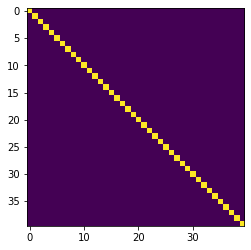

In [14]:
for i in range(len(testDiag)):
    testDiag[i,i,i]=1

testDiagSum = sum(testDiag)

plt.imshow(testDiagSum)

In [15]:
reload(mb)

<module 'minBlur' from 'C:\\Users\\wdwor\\Documents\\Simulation\\minBlur.py'>

In [16]:
minblurredPhotonImageDiag = XYZ_Blur(testDiag, zDepBlur = False, xyDepBlur = False, fovSize = 10e-6)
zblurredPhotonImageDiag = XYZ_Blur(testDiag, zDepBlur = True, xyDepBlur = False, fovSize = 10e-6)
xyblurredPhotonImageDiag = XYZ_Blur(testDiag, zDepBlur = False, xyDepBlur = True, fovSize = 10e-6)
blurredPhotonImageDiag = XYZ_Blur(testDiag, zDepBlur = True, xyDepBlur = True, fovSize = 10e-6)

Text(0.5, 1.0, 'Both Z and XY blur applied.')

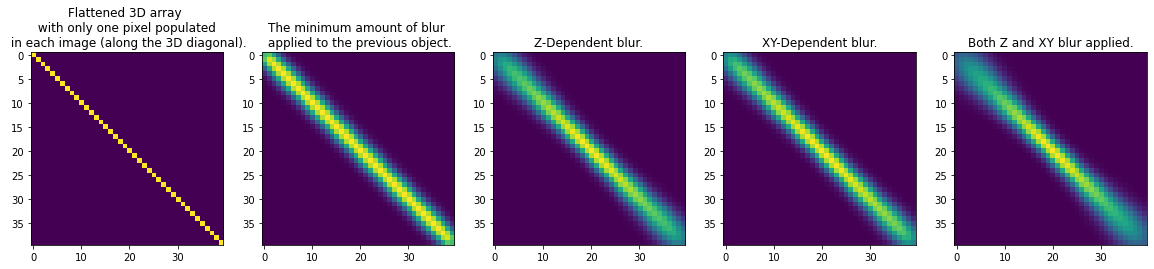

In [17]:
fig, axs = plt.subplots(1,5, figsize=(20,40))

axs[0].imshow(testDiagSum)
axs[0].set_title('Flattened 3D array \n with only one pixel populated \n in each image (along the 3D diagonal).')

axs[1].imshow(minblurredPhotonImageDiag)
axs[1].set_title('The minimum amount of blur \n applied to the previous object.')

axs[2].imshow(zblurredPhotonImageDiag)
axs[2].set_title('Z-Dependent blur.')

axs[3].imshow(xyblurredPhotonImageDiag)
axs[3].set_title('XY-Dependent blur.')

axs[4].imshow(blurredPhotonImageDiag)
axs[4].set_title('Both Z and XY blur applied.')

### Plot minBlur to test

In [18]:
reload(mb)

<module 'minBlur' from 'C:\\Users\\wdwor\\Documents\\Simulation\\minBlur.py'>

In [20]:
fsill=0.0156

In [21]:
dx = np.linspace(0.99*fsill, 1.01*fsill, 10000)

In [22]:
res = np.array([mb.minBlur(x) for x in dx])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

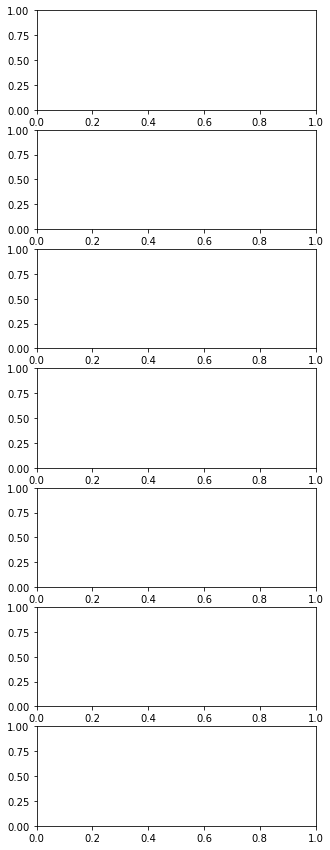

In [23]:
fig, axs = plt.subplots(7,1, figsize=(5,15))
axs[0].plot(dx, res[:,0])
axs[0].set_ylabel('blurAmount')
axs[0].set_ylim(0, 0.001)
axs[1].plot(dx, res[:,1])
axs[1].set_ylabel('mTot')
axs[1].set_ylim(-200, 200)
axs[2].plot(dx, res[:,2])
axs[2].set_ylabel('si1')
axs[2].set_ylim(-2, 2)
axs[3].plot(dx, res[:,3])
axs[3].set_ylabel('si2')
axs[3].set_ylim(-2, 2)
axs[4].set_ylabel('so2')
axs[4].plot(dx, res[:,4])
axs[4].set_ylim(-2, 2)
axs[5].set_ylabel('wi2')
axs[5].plot(dx, res[:,5])
axs[5].set_ylim(0, 0.0001)
axs[6].set_ylabel('dcam')
axs[6].plot(dx, res[:,6])
axs[6].set_ylim(-1, 3)

### Extend Mark's 2D simulation to 3D

In [24]:
import MarksConstants as mc

In [25]:
with open('2dExcitedStateExpansion.csv','rb') as datafile:
    images_f = datafile.readlines()

In [26]:
imageArray = []
for imageStr in images_f:
    imageListStr = imageStr.split(b',')
    imageList = [float(dp) for dp in imageListStr[:-1]]
    imageArray.append(np.reshape(imageList,(1000,1000)))

In [27]:
zTotalSize = 5e-6

In [28]:
array3D = np.zeros((100,1000,1000))
dzPos = np.linspace(-zTotalSize/2, zTotalSize/2, num=100)
xySlice = imageArray[50]

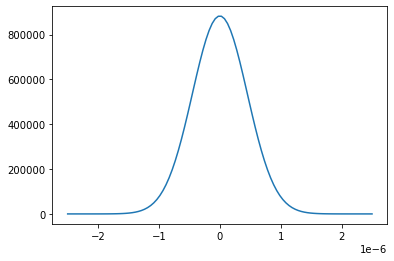

In [29]:
def zGaussian(time, z):
    sigma_x_0 = np.sqrt(mc.hbar/(mc.Rb87_M*2*np.pi*35e3))
    sigma_v = np.sqrt(mc.hbar*np.pi*35e3/mc.Rb87_M)
    sigma  = np.sqrt(sigma_v**2*(time*1e-6)**2 + sigma_x_0**2)
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(z)**2/(2*sigma**2))
plt.plot(dzPos, zGaussian(50, dzPos))

### Check Z normalization

In [30]:
zSum = np.sum(zGaussian(50,dzPos))*(zTotalSize/100)
print(zSum)

0.9899999776797467


In [32]:
wavefunctionSlices= []
for i, zSlice in enumerate(array3D):
    zSlice = xySlice*zGaussian(50, dzPos[i])
    wavefunctionSlices.append(zSlice)
#print(wavefunctionSlices)
wavefunctionSlices = np.array(wavefunctionSlices)
print(wavefunctionSlices.shape)

(100, 1000, 1000)


### Check XY normalization

In [33]:
xySum = np.sum(xySlice.flatten())
print(xySum)

1.0558129761704102e-15


In [34]:
allSum = np.sum(wavefunctionSlices.flatten())
print(allSum)

2.090509645685378e-08


### Bin data

In [35]:
def softwareBinning(binningParams, rawData):
    if binningParams is not None:
        sb = binningParams
        if len(np.array(rawData).shape) == 3: 
            if not ((rawData.shape[1]/sb[0]).is_integer()): 
                raise ValueError('Vertical size ' + str(rawData.shape[1]) +  ' not divisible by binning parameter ' + str(sb[0]))
            if not ((rawData.shape[2]/sb[1]).is_integer()):
                raise ValueError('Horizontal size ' + str(rawData.shape[2]) +  ' not divisible by binning parameter ' + str(sb[1]))
            rawData = rawData.reshape(rawData.shape[0], rawData.shape[1]//sb[0], sb[0], rawData.shape[2]//sb[1], sb[1]).sum(4).sum(2)
        elif len(np.array(rawData).shape) == 2:
            if not ((rawData.shape[0]/sb[0]).is_integer()): 
                raise ValueError('Vertical size ' + str(rawData.shape[0]) +  ' not divisible by binning parameter ' + str(sb[0]))
            if not ((rawData.shape[1]/sb[1]).is_integer()):
                raise ValueError('Horizontal size ' + str(rawData.shape[1]) +  ' not divisible by binning parameter ' + str(sb[1]))
            rawData = rawData.reshape(rawData.shape[0]//sb[0], sb[0], rawData.shape[1]//sb[1], sb[1]).sum(3).sum(1)
        else:
            raise ValueError('Raw data must either 2 or 3 dimensions')            
    return rawData

(100, 100, 100)


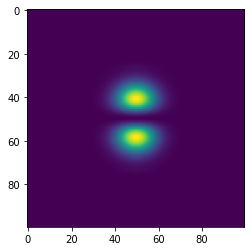

In [36]:
binnedwvftn = softwareBinning([10,10], wavefunctionSlices)
plt.imshow(binnedwvftn[10])
print(binnedwvftn.shape)

Text(0.5, 1.0, 'Wave function in the XZ plane \n after 50 us expansion')

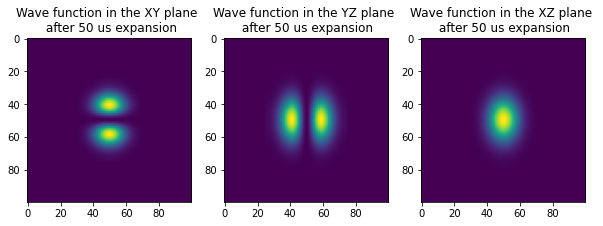

In [188]:
fig, axs = plt.subplots(1,3, figsize=(10,20))

axs[0].imshow(binnedwvftn[50,:,:])
axs[0].set_title('Wave function in the XY plane \n after 50 us expansion')

axs[1].imshow(binnedwvftn[:,:,50])
axs[1].set_title('Wave function in the YZ plane \n after 50 us expansion')

axs[2].imshow(binnedwvftn[:,50,:])
axs[2].set_title('Wave function in the XZ plane \n after 50 us expansion')

### Apply blur

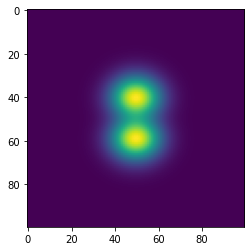

In [155]:
blurredwvftn = XYZ_Blur(binnedwvftn)
plt.imshow(blurredwvftn)